<a href="https://colab.research.google.com/github/alejandro-cermeno/2021_Market_Timing-Cermeno/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Alejandro Cermeño 

06/2021

In [30]:
# Configuración premiliminar

    # Librerias necesarias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
from google.colab import drive

    # Directorio 
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/TESIS/Code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Obtencion de datos

df = pd.read_excel('datos.xlsx', sheet_name= 'datos')

ipsa     = df.iloc[:,4:6]
mexbol   = df.iloc[:,0:2]
spblpgpt = df.iloc[:,2:4]

In [16]:
# Preparacion de datos

series = [mexbol, spblpgpt, ipsa]

    # Limpieza 
for i in range(len(series)):
  series[i] = series[i].dropna() # Elimina valores ausentes
  series[i] = series[i].set_index(list(series[i].columns[[0]])) # Establece el indice

    # Transformacion a retornos
def logret(df):

  '''Tranforma la serie de precios al logaritmo del retorno'''

  logret_series = [] # Almacenamiento de resultados

  for i in range(len(series)):

    logret =(100 * (np.log(df[i]) - np.log(df[i].shift(1)))).dropna()
    logret_series.append(logret)

  return logret_series # Salida

logret_series = logret(series)

         count       max        min       std      skew      kurt
mexbol  7094.0  12.15364 -14.313884  1.404593  0.029926  7.515624
           count        max       min       std      skew       kurt
spblpgpt  4842.0  12.815562 -13.29076  1.372947 -0.597023  12.236378
       count        max        min       std      skew       kurt
ipsa  7686.0  11.803367 -15.215545  1.171008 -0.316004  12.175782




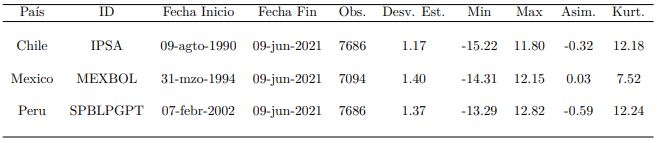

In [26]:
# Inspeccion de datos

    # Estadísticos descriptivos

def describe(df):

  '''Calcula el número de observaciones, desviación estandar, valor mínimo y
  máximo, simetría y kurtosis de las series ingresadas'''

  descrip = [] # Almacenamiento de resultados

  for i in range(len(series)):

    # Se especifican los estadísticos
    descrip = pd.concat([df[i].describe().loc[['count','max', 'min', 'std']].T,
                         df[i].skew().rename('skew'),
                         df[i].kurt().rename('kurt')],
                      axis=1)
    
    descrip.append(descrip) # Consolidación de resultados de series ingresadas

    print(descrip) # Salida

describe(logret_series)
print('')
print('')
Image(filename='estadisticos_descriptivos.JPG') 

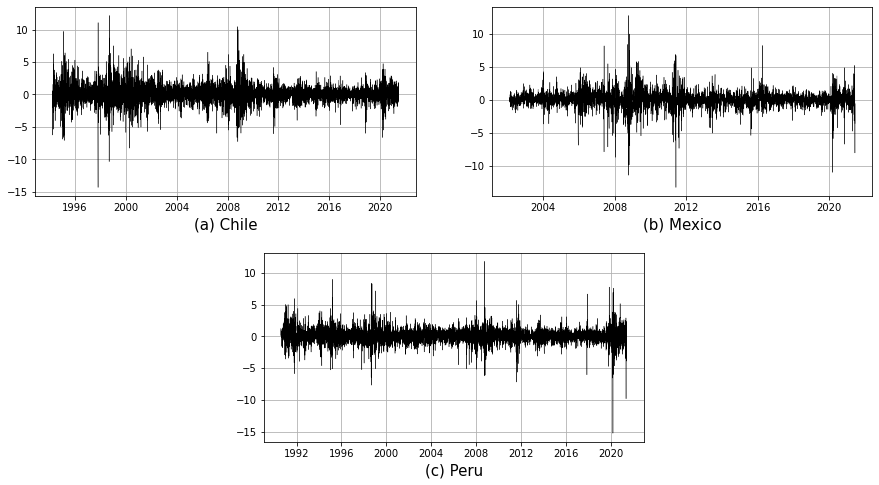

In [31]:
# Grafico de retornos

plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (15,8)

gs = gridspec.GridSpec(2, 4)
gs.update(hspace = 0.3, wspace = 0.5)
ax1 = plt.subplot(gs[0, :2], )
ax1.plot(logret_series[0], color = 'black', linewidth=0.4)
ax1.set_xlabel('(a) Chile', fontsize=15)

ax2 = plt.subplot(gs[0, 2:])
ax2.plot(logret_series[1], color = 'black', linewidth=0.4)
ax2.set_xlabel('(b) Mexico', fontsize=15)

ax3 = plt.subplot(gs[1, 1:3])
ax3.plot(logret_series[2], color = 'black', linewidth=0.4)
ax3.set_xlabel('(c) Peru', fontsize=15)

plt.show()

In [ ]:
spblpgpt

,fecha.1,spblpgpt
0,2002-02-07,1260.86
1,2002-02-08,1265.62
2,2002-02-11,1263.40
3,2002-02-12,1263.60
4,2002-02-13,1264.62
...,...,...
4838,2021-06-03,21382.67
4839,2021-06-04,22218.67
4840,2021-06-07,20497.95
4841,2021-06-08,20385.54
